In [1]:
import pandas as pd
df=pd.read_csv("police_department_data (1).csv")

In [2]:
df

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)"


In [3]:
df = df[df['category'] != 'NON-CRIMINAL	']

In [4]:
df["crime_date"] = pd.to_datetime(df['crime_date'])

In [5]:
df.dropna(inplace=True)

In [6]:
df['hour'] = df['crime_date'].apply(lambda x: x.hour)
df['hour']

0         11
1         11
2         14
3         23
4          0
          ..
150495    21
150496     8
150497    20
150498    10
150499    14
Name: hour, Length: 150499, dtype: int64

In [7]:
df['hour'].unique()

array([11, 14, 23,  0, 21,  1, 12, 10, 22, 13,  7, 16, 17,  4,  6,  9, 15,
       19, 20,  5,  2,  8, 18,  3], dtype=int64)

In [8]:
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,hour
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",11
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",14
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",23
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",0


In [9]:
df.groupby("crime_description")["crime_description"].count().sort_values()

crime_description
INTERFERRING WITH A FIREMAN                      1
FORCIBLE RAPE, ARMED WITH A GUN                  1
ROBBERY,  ATM, KNIFE, ATT.                       1
ROBBERY, VEHICLE FOR HIRE, ATT., W/ FORCE        1
SAFE BURGLARY OF A HOTEL                         1
                                             ...  
MALICIOUS MISCHIEF, VANDALISM                 4262
PETTY THEFT OF PROPERTY                       4416
AIDED CASE, MENTAL DISTURBED                  4566
LOST PROPERTY                                 4596
GRAND THEFT FROM LOCKED AUTO                 17740
Name: crime_description, Length: 726, dtype: int64

In [10]:
df["category"].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df["category_N"]=labelencoder.fit_transform(df["category"])
df

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,hour,category_N
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",11,38
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",11,38
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",14,37
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",23,20
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",0,20
...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)",21,1
150496,176000742,NON-CRIMINAL,LOST PROPERTY,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)",8,20
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)",20,16
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)",10,16


In [12]:
df["category_N"].value_counts()

16    40408
21    19599
20    17866
1     13577
35     8589
36     6419
37     5914
4      5802
32     5782
19     4338
7      4243
25     3299
13     2635
27     1841
34     1812
38     1658
28      940
30      882
24      736
5       658
23      641
12      619
8       465
6       378
0       286
15      257
9       168
17      156
26      140
31       69
3        66
10       60
11       53
18       42
29       40
2        34
14       20
22        4
33        3
Name: category_N, dtype: int64

In [13]:
df["category"].value_counts()

LARCENY/THEFT                  40408
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [14]:
crime_in_24hr =df.groupby('hour')['hour'].count()

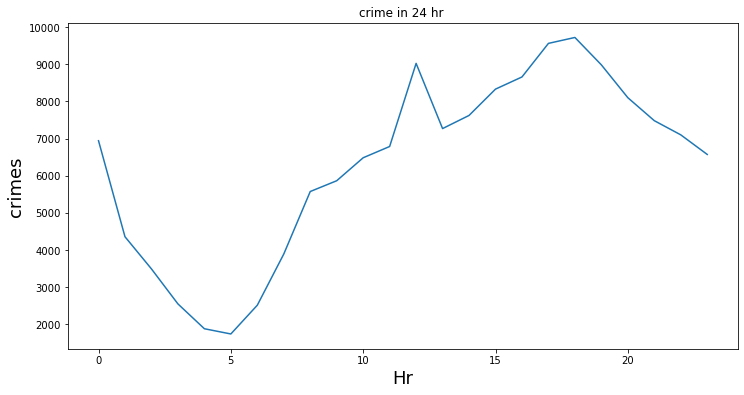

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
crime_in_24hr.plot()
plt.title('crime in 24 hr ')
plt.xlabel('Hr',fontsize=18)
plt.ylabel('crimes',fontsize=18)
plt.show()

In [17]:
x = df.iloc[:, [9, 10]].values  

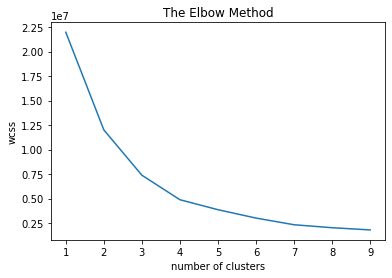

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []           
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()